# ICA Anomaly Detection

In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing as pp
from sklearn.model_selection import train_test_split
from sklearn.decomposition import FastICA
from sklearn.metrics import roc_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
import matplotlib.pyplot as plt

## Load the data

In [2]:
data = pd.read_csv('./data/active_wiretap/Active_Wiretap_dataset.csv', dtype=np.float32)
labels = pd.read_csv('./data/active_wiretap/Active_Wiretap_labels.csv',index_col=0, dtype=np.int32)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2278688 entries, 0 to 2278687
Columns: 115 entries, 1.000000000000000000e+00 to 0.000000000000000000e+00.54
dtypes: float32(115)
memory usage: 999.6 MB


In [4]:
labels.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2278689 entries, 1 to 2278689
Data columns (total 1 columns):
 #   Column  Dtype
---  ------  -----
 0   x       int32
dtypes: int32(1)
memory usage: 26.1 MB


In [5]:
data.head(5)

,1.000000000000000000e+00,2.090000000000000000e+02,0.000000000000000000e+00,1.000000000000000000e+00.1,2.090000000000000000e+02.1,0.000000000000000000e+00.1,1.000000000000000000e+00.2,2.090000000000000000e+02.2,0.000000000000000000e+00.2,1.000000000000000000e+00.3,...,0.000000000000000000e+00.48,0.000000000000000000e+00.49,0.000000000000000000e+00.50,1.000000000000000000e+00.24,2.090000000000000000e+02.28,0.000000000000000000e+00.51,2.090000000000000000e+02.29,0.000000000000000000e+00.52,0.000000000000000000e+00.53,0.000000000000000000e+00.54
0,1.997325,862.373962,425755.500000,1.998394,862.024414,425755.968750,1.999464,861.674805,425756.21875,1.999946,...,425756.250000,0.0,0.0,1.999995,861.501770,652.500000,861.501770,425756.250000,0.0,0.0
1,2.996411,1079.842896,378082.656250,2.997845,1079.505859,378229.718750,2.999281,1079.168579,378376.62500,2.999928,...,378442.656250,0.0,0.0,2.999993,1079.001709,615.182312,1079.001709,378449.281250,0.0,0.0
2,3.994159,1188.540894,318800.531250,3.996493,1188.224731,319007.250000,3.998830,1187.908325,319213.87500,3.999883,...,319306.843750,0.0,0.0,3.999988,1187.751587,565.080688,1187.751587,319316.156250,0.0,0.0
3,4.992429,1253.731445,271910.781250,4.995455,1253.438965,272140.062500,4.998484,1253.146362,272369.34375,4.999848,...,272472.531250,0.0,0.0,4.999985,1253.001465,521.998901,1253.001465,272482.843750,0.0,0.0
4,5.989159,1297.187988,235932.203125,5.993491,1296.912964,236171.765625,5.997829,1296.637695,236411.40625,5.999783,...,236519.265625,0.0,0.0,5.999978,1296.501343,486.343567,1296.501343,236530.046875,0.0,0.0


In [6]:
labels.head(5)

,x
1,0
2,0
3,0
4,0
5,0


In [7]:
data.describe()

,1.000000000000000000e+00,2.090000000000000000e+02,0.000000000000000000e+00,1.000000000000000000e+00.1,2.090000000000000000e+02.1,0.000000000000000000e+00.1,1.000000000000000000e+00.2,2.090000000000000000e+02.2,0.000000000000000000e+00.2,1.000000000000000000e+00.3,...,0.000000000000000000e+00.48,0.000000000000000000e+00.49,0.000000000000000000e+00.50,1.000000000000000000e+00.24,2.090000000000000000e+02.28,0.000000000000000000e+00.51,2.090000000000000000e+02.29,0.000000000000000000e+00.52,0.000000000000000000e+00.53,0.000000000000000000e+00.54
count,2.278688e+06,2.278688e+06,2.278688e+06,2.278688e+06,2.278688e+06,2.278688e+06,2.278688e+06,2.278688e+06,2.278688e+06,2.278688e+06,...,2.278688e+06,2.278688e+06,2.278688e+06,2.278688e+06,2.278688e+06,2.278688e+06,2.278688e+06,2.278688e+06,2.278688e+06,2.278688e+06
mean,2.652878e+02,1.255537e+03,1.612102e+05,4.368374e+02,1.256197e+03,1.605001e+05,1.298612e+03,1.256852e+03,1.597298e+05,1.266996e+04,...,1.599038e+05,-5.413128e+00,-6.317837e-04,2.040831e+04,1.256995e+03,3.809856e+02,1.317058e+03,1.598823e+05,-7.518375e+00,-1.660498e-03
std,1.116644e+02,2.828737e+02,4.546664e+04,1.781977e+02,2.827937e+02,4.400182e+04,5.215366e+02,2.827819e+02,4.281419e+04,5.236500e+03,...,4.807984e+04,2.603865e+02,1.651825e-02,8.001625e+03,2.872357e+02,1.088074e+02,7.646614e+01,4.784414e+04,2.645843e+02,1.951971e-02
min,1.000000e+00,6.000000e+01,0.000000e+00,1.000000e+00,6.000000e+01,0.000000e+00,1.000000e+00,6.000000e+01,0.000000e+00,1.000000e+00,...,0.000000e+00,-3.286699e+04,-8.553002e-01,1.000000e+00,6.000000e+01,0.000000e+00,6.000000e+01,0.000000e+00,-3.313150e+04,-8.566865e-01
25%,1.771147e+02,1.296878e+03,1.458865e+05,2.956081e+02,1.297720e+03,1.442613e+05,8.790717e+02,1.296779e+03,1.424144e+05,8.724622e+03,...,1.796834e+05,0.000000e+00,0.000000e+00,1.451135e+04,1.334772e+03,4.253403e+02,1.334939e+03,1.809145e+05,0.000000e+00,0.000000e+00
50%,2.524109e+02,1.323878e+03,1.709065e+05,4.136435e+02,1.328468e+03,1.742176e+05,1.163974e+03,1.334525e+03,1.785883e+05,1.127817e+04,...,1.813216e+05,0.000000e+00,0.000000e+00,2.401334e+04,1.340341e+03,4.259172e+02,1.340510e+03,1.814055e+05,0.000000e+00,0.000000e+00
75%,3.557147e+02,1.340670e+03,1.884503e+05,6.004106e+02,1.340804e+03,1.866128e+05,1.750354e+03,1.340259e+03,1.847144e+05,1.692110e+04,...,1.825522e+05,0.000000e+00,0.000000e+00,2.678070e+04,1.340870e+03,4.265397e+02,1.340996e+03,1.819362e+05,0.000000e+00,0.000000e+00
max,5.364808e+02,1.514000e+03,5.285276e+05,8.035607e+02,1.514000e+03,5.285285e+05,2.117662e+03,1.513977e+03,5.221716e+05,1.983251e+04,...,4.888391e+05,2.380501e+04,1.071544e+00,3.053129e+04,1.418888e+03,6.991706e+02,1.420156e+03,4.888395e+05,2.373676e+04,1.079229e+00


## Scale the data

In [8]:
# scale the data
scaler = pp.MinMaxScaler()
data = scaler.fit_transform(data)
data = pd.DataFrame(data)
data.describe()

,0,1,2,3,4,5,6,7,8,9,...,105,106,107,108,109,110,111,112,113,114
count,2.278688e+06,2.278688e+06,2.278688e+06,2.278688e+06,2.278688e+06,2.278688e+06,2.278688e+06,2.278688e+06,2.278688e+06,2.278688e+06,...,2.278688e+06,2.278688e+06,2.278688e+06,2.278688e+06,2.278688e+06,2.278688e+06,2.278688e+06,2.278688e+06,2.278688e+06,2.278688e+06
mean,4.935523e-01,8.222400e-01,3.050174e-01,5.430585e-01,8.226944e-01,3.036735e-01,6.130465e-01,8.231573e-01,3.058952e-01,6.388294e-01,...,3.271092e-01,5.798556e-01,4.435584e-01,6.684283e-01,8.808641e-01,5.449103e-01,9.242014e-01,3.270650e-01,5.824689e-01,4.416649e-01
std,2.085310e-01,1.945486e-01,8.602510e-02,2.220364e-01,1.944936e-01,8.325344e-02,2.463958e-01,1.944886e-01,8.199255e-02,2.640495e-01,...,9.835514e-02,4.594623e-03,8.572696e-03,2.620880e-01,2.113756e-01,1.556235e-01,5.621867e-02,9.787289e-02,4.652583e-03,1.008293e-02
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.288909e-01,8.506727e-01,2.760243e-01,3.670852e-01,8.512515e-01,2.729489e-01,4.148379e-01,8.506180e-01,2.727349e-01,4.398870e-01,...,3.675718e-01,5.799512e-01,4.438865e-01,4.752771e-01,9.380996e-01,6.083499e-01,9.373477e-01,3.700897e-01,5.826010e-01,4.425227e-01
50%,4.695050e-01,8.692419e-01,3.233634e-01,5.141586e-01,8.723988e-01,3.296277e-01,5.494377e-01,8.765783e-01,3.420107e-01,5.686493e-01,...,3.709228e-01,5.799512e-01,4.438865e-01,7.865087e-01,9.421977e-01,6.091749e-01,9.414440e-01,3.710942e-01,5.826010e-01,4.425227e-01
75%,6.624228e-01,8.807910e-01,3.565571e-01,7.468726e-01,8.808829e-01,3.530799e-01,8.264682e-01,8.805224e-01,3.537428e-01,8.531925e-01,...,3.734404e-01,5.799512e-01,4.438865e-01,8.771517e-01,9.425868e-01,6.100653e-01,9.418011e-01,3.721799e-01,5.826010e-01,4.425227e-01
max,1.000000e+00,1.000000e+00,1.000000e+00,9.999999e-01,1.000000e+00,1.000000e+00,1.000000e+00,9.999999e-01,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,9.999999e-01,1.000000e+00,1.000000e+00,9.999999e-01,1.000000e+00,1.000000e+00,1.000000e+00


## Train-Test Split

In [9]:
# drop the last row
labels=labels[:-1]
labels.tail(5)

,x
2278684,1
2278685,1
2278686,1
2278687,1
2278688,1


In [10]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, shuffle=False, test_size=0.3)

In [11]:
print(f'Number anomalies in train data: {y_train.sum()}')

Number anomalies in train data: x    279997
dtype: int64


In [12]:
print(f'Number anomalies in test data: {y_test.sum()}')

Number anomalies in test data: x    643218
dtype: int64


## Train ICA

In [13]:
# create and fit pca
ica = FastICA(n_components=23, max_iter=100, tol=0, whiten='eigh')
ica.fit(X_train)
train_ica = ica.transform(X_train)

/home/alex/MySci/anomaly/lib/python3.10/site-packages/sklearn/decomposition/_fastica.py:120: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(


In [14]:
inverse_train = ica.inverse_transform(train_ica)

In [15]:
def reconstr_error(original, reconstr):
    errors = np.sqrt(np.sum((original - reconstr)**2, axis=1))
    return errors

In [16]:
errors = reconstr_error(X_train, inverse_train)

In [17]:
# average precision score train
aps_train = average_precision_score(y_train, errors)
print(f'Average precision score for train: {aps_train:.4f}')

Average precision score for train: 0.2386


## Test ICA

In [18]:
test_ica = ica.transform(X_test)
inverse_test = ica.inverse_transform(test_ica)

In [19]:
test_errors = reconstr_error(X_test, inverse_test)

In [20]:
# average precision score test
aps_test = average_precision_score(y_test, test_errors)
print(f'Average precision score for test: {aps_test:.4f}')

Average precision score for test: 0.9144


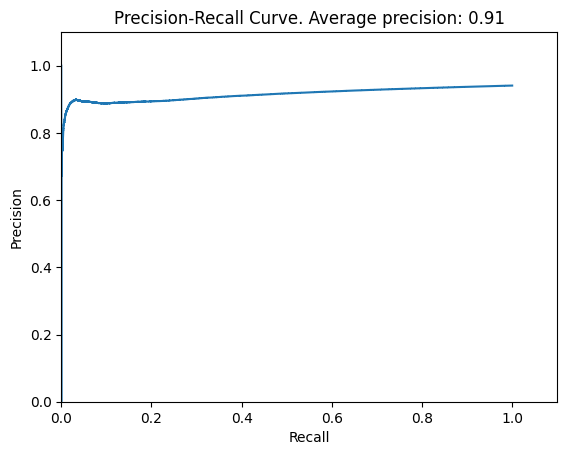

In [21]:
# precision-recall curve for test results
precision, recall, thresholds = precision_recall_curve(y_test, test_errors)
plt.title(f'Precision-Recall Curve. Average precision: {aps_test:.2f}')
plt.xlabel('Recall')
plt.xlim([0, 1.1])
plt.ylim([0, 1.1])
plt.ylabel('Precision')
#plt.ylim([0, 1.1])
#plt.xlim([0, 1.0])
plt.plot(recall, precision)
plt.show()

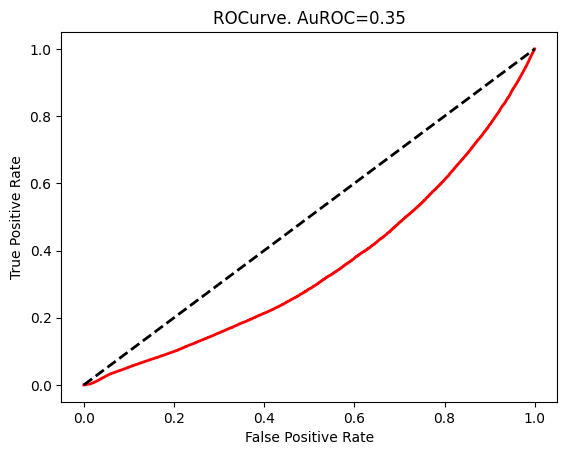

In [22]:
# receiver operational characteristic
fpr, tpr, thresholds = roc_curve(y_test, test_errors)
auROC = auc(fpr, tpr)
plt.figure()
plt.title(f'ROCurve. AuROC={auROC:.2f}')
plt.plot(fpr, tpr, color='r', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot([0,1], [0,1], color='k', lw=2, linestyle='--')
plt.show()